In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Billboard.csv')

relevant_columns = ['performer','song','year','week','week_position']
df_rel = df[relevant_columns]
df_rel

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8
...,...,...,...,...,...
327890,Ariana Grande,God Is A Woman,2018,42,22
327891,Rose Royce,I Wanna Get Next To You,1977,21,22
327892,Eric Clapton And His Band,I Can't Stand It,1981,21,22
327893,Al Green,Here I Am Come & Take Me,1973,39,22


In [4]:
num_weeks = df_rel.groupby('performer')['song'].value_counts()
num_weeks
columns = ['performer','song']
df_popular = df_rel[df_rel["song"].isin(num_weeks.index)][columns]
df_popular.drop_duplicates(inplace = True)
# df_popular['count'] = num_weeks
# df_popular
num_weeks_df = pd.DataFrame(num_weeks)
num_weeks_df.sort_values(by = 'count', ascending = False, inplace = True)
num_weeks_df.reset_index(inplace = True)
num_weeks_df.head(10)

,performer,song,count
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,Jason Mraz,I'm Yours,76
3,The Weeknd,Blinding Lights,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Adele,Rolling In The Deep,65
8,Jewel,Foolish Games/You Were Meant For Me,65
9,Carrie Underwood,Before He Cheats,64


In [5]:
# tets = pd.DataFrame({'num_ratings': num_weeks})
# df_popular['count'] = df_popular['song'].map(num_weeks)
# df_popular.sort_values(by = 'count', ascending = False, inplace = True)
# df_popular  
df

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327890,327891,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,2018,42
327891,327892,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,1977,21
327892,327893,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,1981,21
327893,327894,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,1973,39


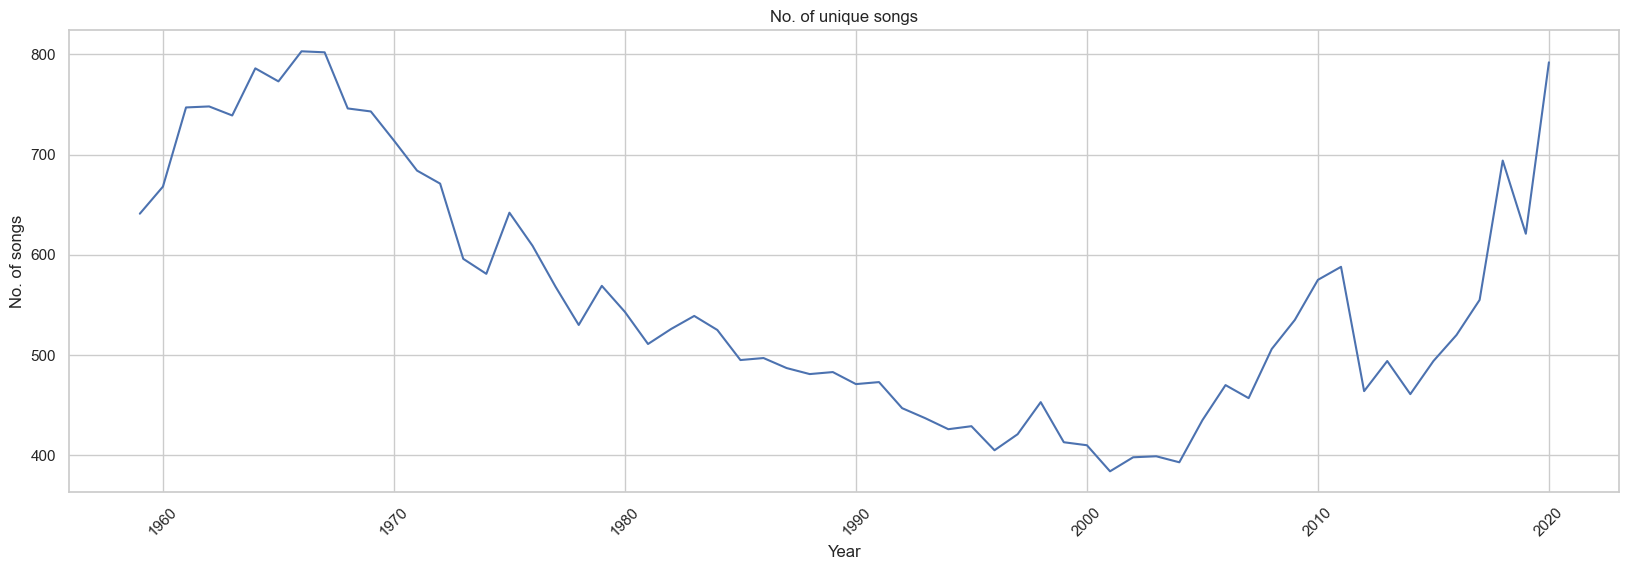

In [39]:
num_songs = df[((df['year']>1958) & (df['year']<2021))].groupby('year')['song'].nunique()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.lineplot(x=num_songs.index, y=num_songs.values)#, palette="colorblind")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("No. of songs")
plt.title("No. of unique songs")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


C:\Users\Abhijit\AppData\Local\Temp\ipykernel_21612\1464176628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_week.drop_duplicates(subset=['performer','song'], inplace=True)


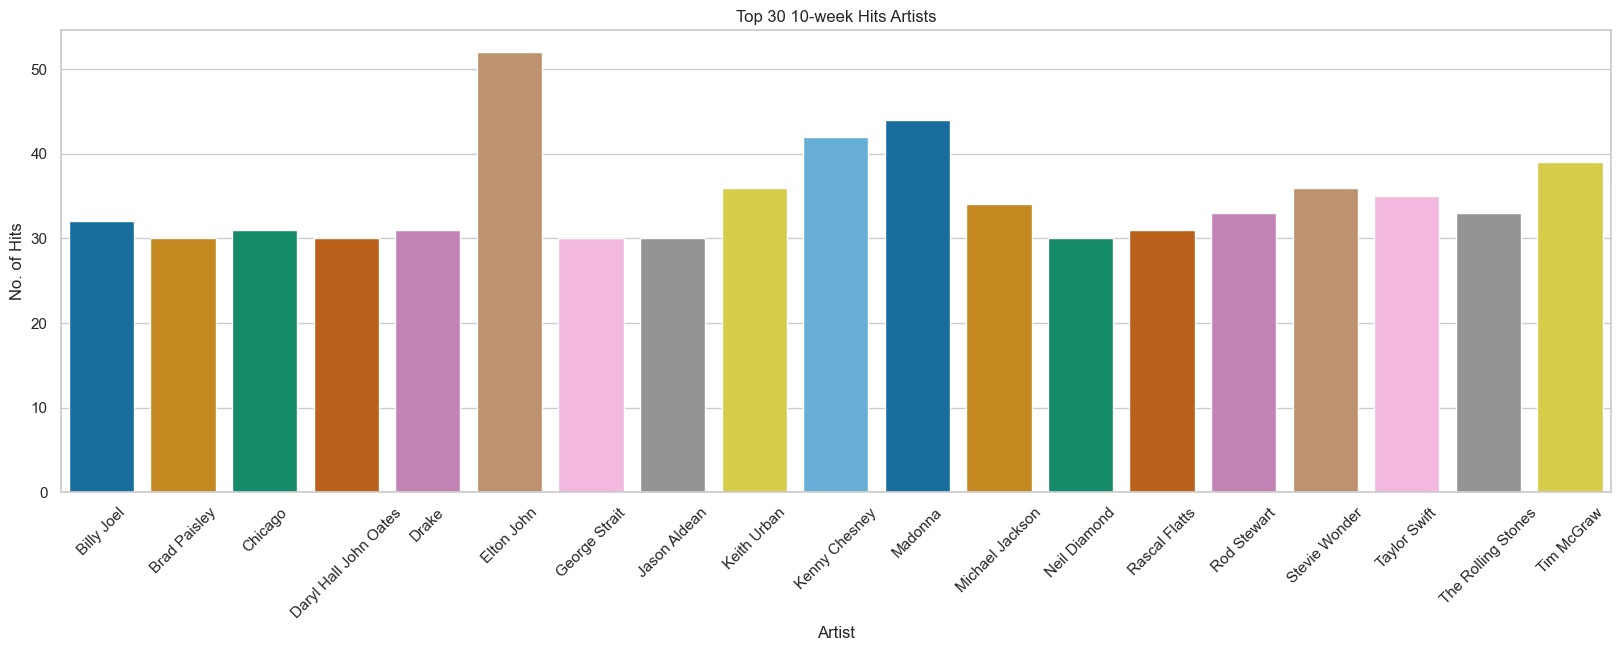

In [38]:
df_10_week = df[df['weeks_on_chart']>=10]
df_10_week.drop_duplicates(subset=['performer','song'], inplace=True)
ten_week_artist = df_10_week.groupby('performer')['song'].count()
ten_week_artist = ten_week_artist[ten_week_artist >= 30]
ten_week_artist

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=ten_week_artist.index, y=ten_week_artist.values, palette="colorblind")

# Add labels and title
plt.xlabel("Artist")
plt.ylabel("No. of Hits")
plt.title("Top 30 10-week Hits Artists")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [31]:
df

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327890,327891,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,2018,42
327891,327892,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,1977,21
327892,327893,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,1981,21
327893,327894,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,1973,39
